In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = "path/combined_cpi_data.csv"
df= pd.read_csv(path)

In [3]:
#Basic information/ data structure of df
print(df.shape)
print(df.dtypes)
print(df.isnull().sum())
print(df.head())
print(df["Description"].nunique())
print(df["SubGroup_Code"].nunique())
print(df["Description"].value_counts().head(20))

(2003, 5)
SubGroup_Code     object
Description       object
Weight           float64
CPI              float64
Date              object
dtype: object
SubGroup_Code    0
Description      0
Weight           0
CPI              0
Date             0
dtype: int64
  SubGroup_Code           Description  Weight    CPI        Date
0        1.1.01  Cereals and products    9.67  129.8  2016-09-01
1        1.1.01  Cereals and products    9.67  130.5  2016-10-01
2        1.1.01  Cereals and products    9.67  131.5  2016-11-01
3        1.1.01  Cereals and products    9.67  132.3  2016-12-01
4        1.1.01  Cereals and products    9.67  132.7  2017-01-01
20
20
Description
Cereals and products                   101
Health                                 101
Egg                                    101
Milk and products                      101
Oils and fats                          101
Fruits                                 101
Vegetables                             101
Pulses and products               

In [4]:
#to format date for further sorting
df["Date"] = pd.to_datetime(df["Date"], errors='coerce') #comment this to show missing data as well

MoSPI and other statistical bodies compute CPI using subgroup weights (based on consumption/expenditure shares).
Using weights gives a more realistic and policy-relevant measure.
It is ideal for time-series forecasting, inflation trend analysis, or comparison with official CPI numbers.
They make the prediction model more aligned with real-world inflation dynamics and policy relevance.

In [5]:
#creating a weighted_cpi dataframe
weighted_cpi = (
    df.groupby("Date")[["CPI", "Weight"]]
    .apply(lambda x: pd.Series({"Weighted_CPI": np.average(x["CPI"], weights=x["Weight"])}))
    .reset_index()
) # Overall weighted CPI per month


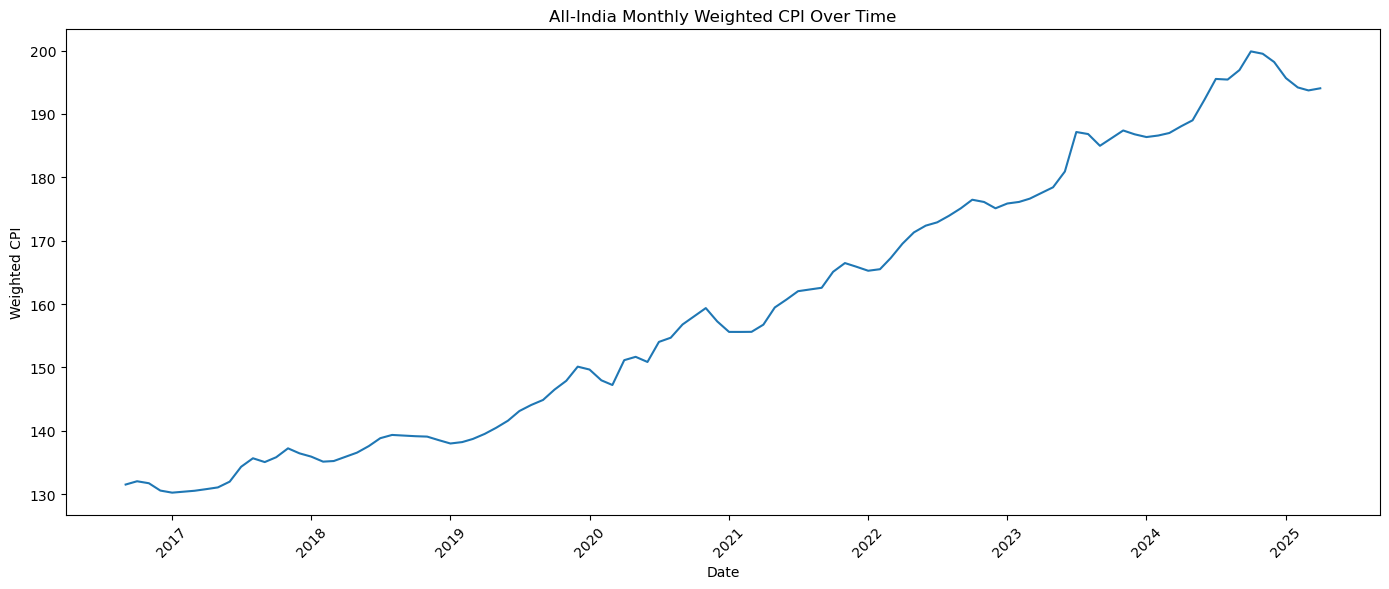

In [6]:
#CPI trend over Time(Overall)
plt.figure(figsize=(14,6))
sns.lineplot(data=weighted_cpi, x="Date", y="Weighted_CPI")
plt.title("All-India Monthly Weighted CPI Over Time")
plt.xlabel("Date")
plt.ylabel("Weighted CPI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

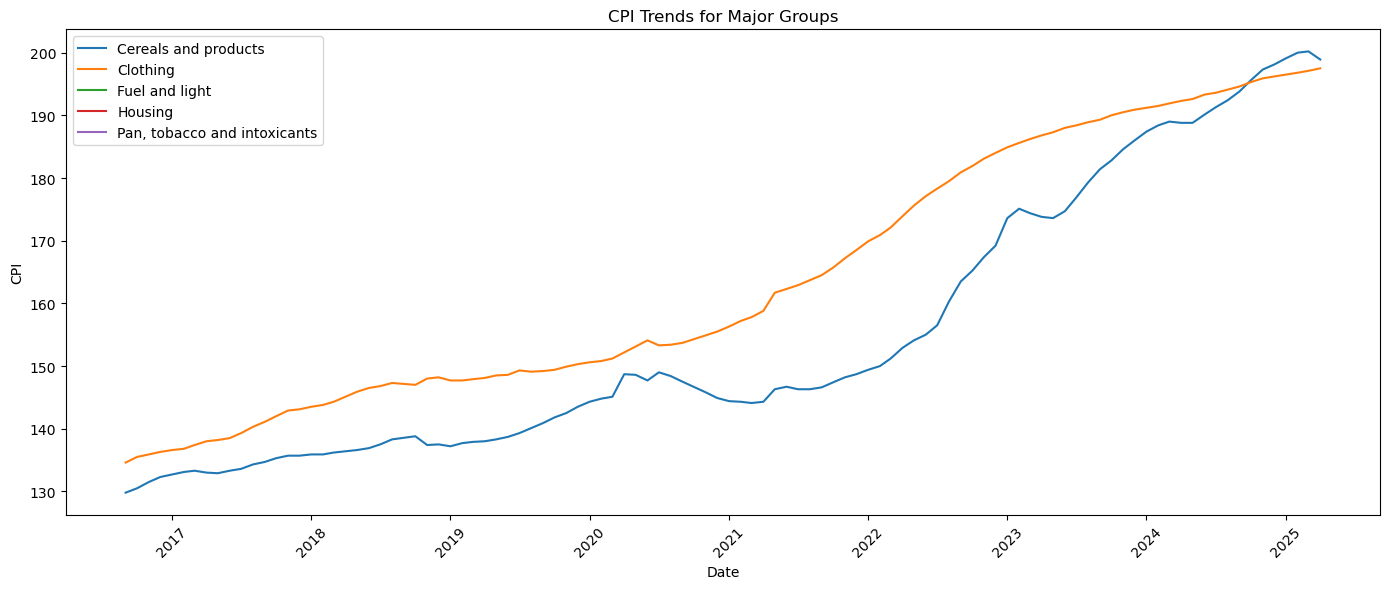

In [7]:
#CPI by Major Categories
top_groups = ["Cereals and products", "Clothing", "Fuel and light", "Housing", "Pan, tobacco and intoxicants"]

plt.figure(figsize=(14,6))
for item in top_groups:
    temp = df[df["Description"] == item]
    sns.lineplot(x="Date", y="CPI", data=temp, label=item)

plt.title("CPI Trends for Major Groups")
plt.xlabel("Date")
plt.ylabel("CPI")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

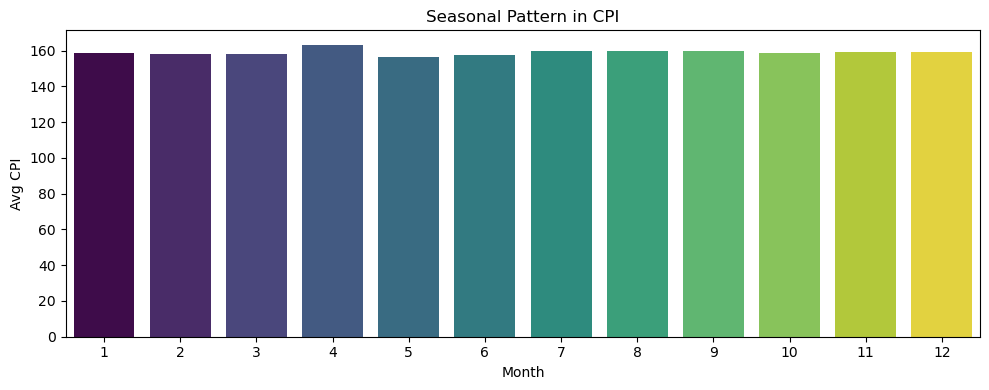

In [8]:
# Seasonal Effects
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

monthly_season = df.groupby("Month")["CPI"].mean().reset_index()

plt.figure(figsize=(10,4))
sns.barplot(data=monthly_season, x="Month", y="CPI", hue="Month", palette="viridis", legend=False)
plt.title("Seasonal Pattern in CPI")
plt.xlabel("Month")
plt.ylabel("Avg CPI")
plt.tight_layout()
plt.show()

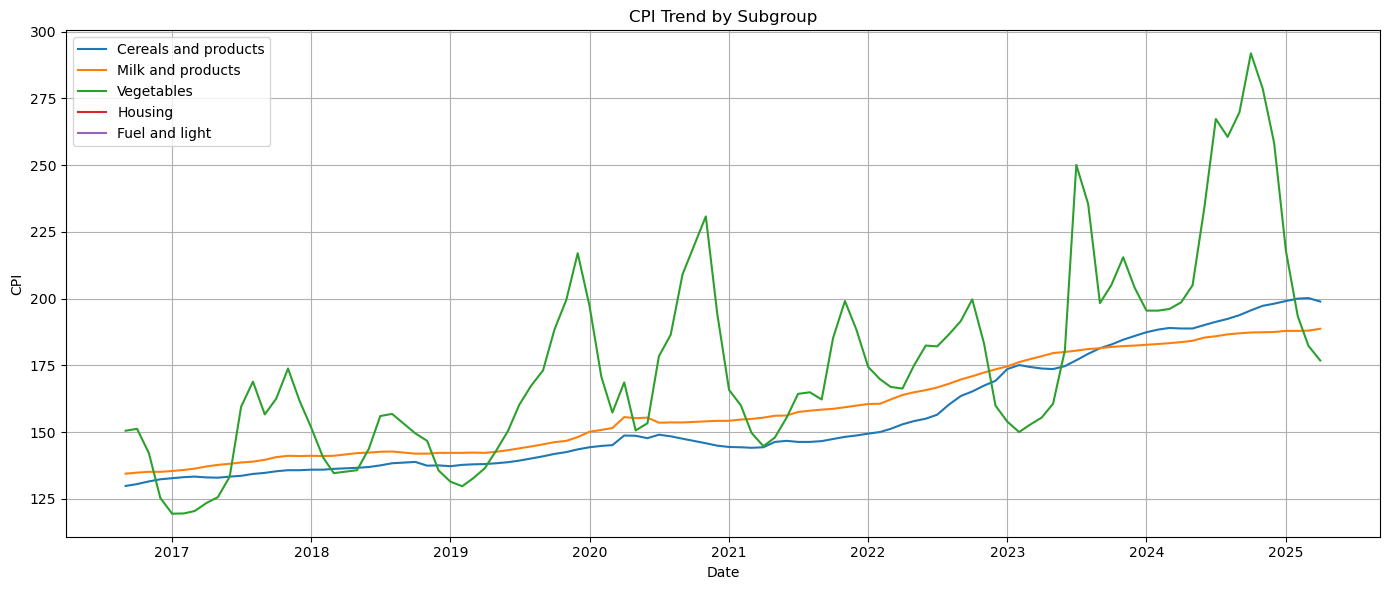

In [9]:
#Trend Analysis by Subgroup
    # Calculate monthly average CPI for each subgroup
subgroup_trend = df.groupby(['Date', 'Description'])['CPI'].mean().reset_index()

    # Plot CPI trends for selected major subgroups
major_subgroups = ['Cereals and products', 'Milk and products', 'Vegetables', 'Housing', 'Fuel and light']

plt.figure(figsize=(14, 6))
for subgroup in major_subgroups:
    subset = subgroup_trend[subgroup_trend['Description'] == subgroup]
    plt.plot(subset['Date'], subset['CPI'], label=subgroup)

plt.title("CPI Trend by Subgroup")
plt.xlabel("Date")
plt.ylabel("CPI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

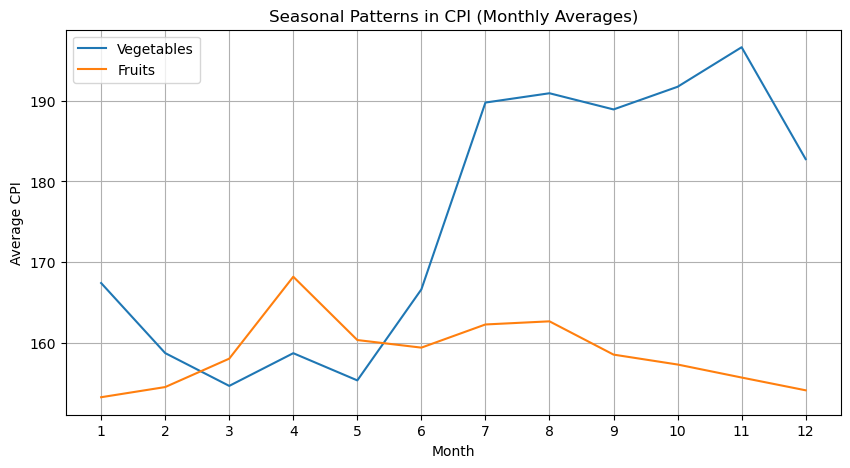

In [10]:
#Seasonality Detection
    # Add month column
df['Month'] = df['Date'].dt.month

    # Monthly average CPI across all years
monthly_seasonality = df.groupby(['Month', 'Description'])['CPI'].mean().reset_index()

    # Plot for one or two key items
seasonal_items = ['Vegetables', 'Fruits']

plt.figure(figsize=(10, 5))
for item in seasonal_items:
    subset = monthly_seasonality[monthly_seasonality['Description'] == item]
    plt.plot(subset['Month'], subset['CPI'], label=item)

plt.title("Seasonal Patterns in CPI (Monthly Averages)")
plt.xlabel("Month")
plt.ylabel("Average CPI")
plt.xticks(range(1,13))
plt.legend()
plt.grid(True)
plt.show()

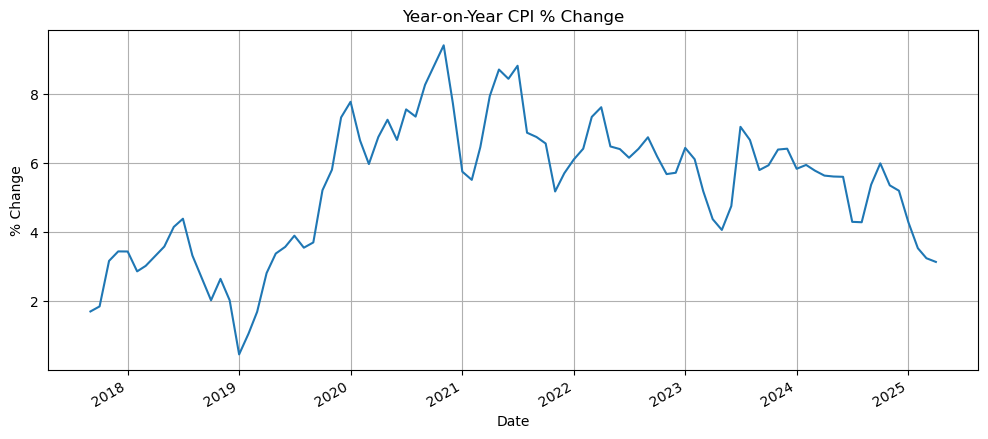

In [11]:
#Year-on-Year (YoY) or Month-on-Month (MoM) % Change
    # Set index to Date for easier shift
df.set_index('Date', inplace=True)

    # Get overall average CPI per month
monthly_avg = df.groupby('Date')['CPI'].mean()

    # YoY % change
yoy_change = monthly_avg.pct_change(periods=12) * 100

yoy_change.plot(figsize=(12,5), title="Year-on-Year CPI % Change", ylabel="% Change")
plt.grid(True)
plt.show()

    # Reset index if needed
df.reset_index(inplace=True)


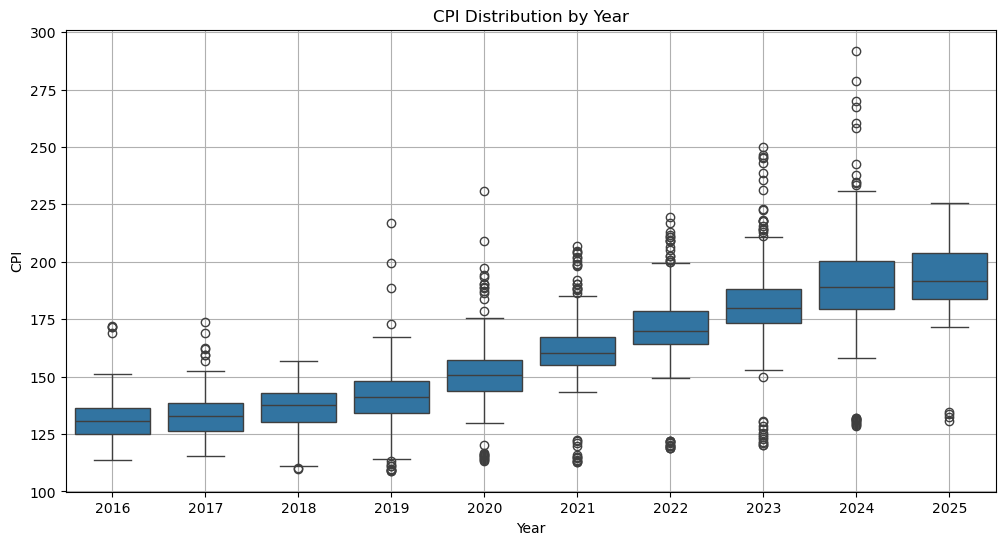

In [12]:
# Boxplot by Year (CPI Distribution across Subgroups):
df['Year'] = df['Date'].dt.year

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Year', y='CPI')
plt.title("CPI Distribution by Year")
plt.grid(True)
plt.show()


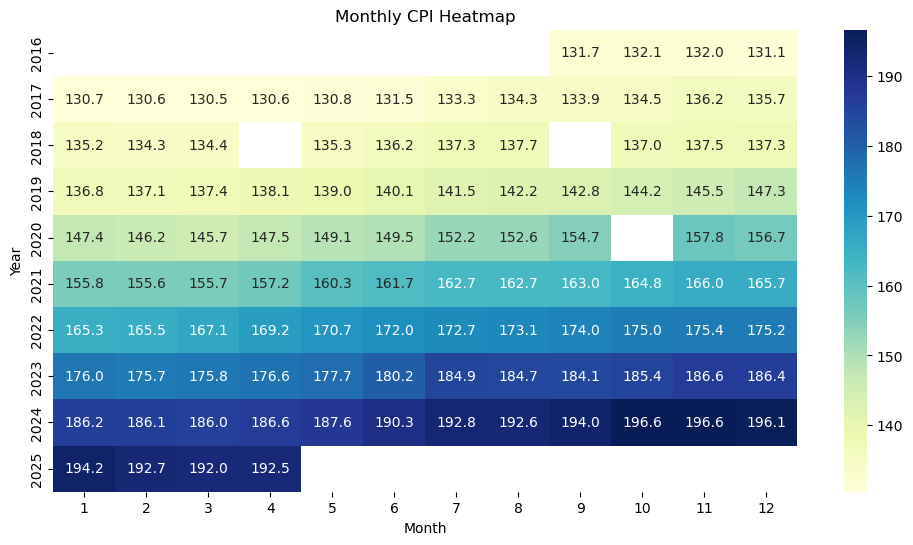

In [13]:
# Heatmap (CPI per Month-Year Average):
    # Pivot table for heatmap
pivot_table = df.groupby(['Year', 'Month'])['CPI'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Monthly CPI Heatmap")
plt.ylabel("Year")
plt.xlabel("Month")
plt.show()

In [14]:
#saving the weighted_cpi for further use
weighted_cpi.to_csv("path/weighted_cpi.csv", index=False)
